In [75]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [76]:
from importlib import reload

In [89]:
from oivis.oiinstru import interferogram, waveguide
import matplotlib

In [114]:
reload(interferogram)

<module 'oivis.oiinstru.interferogram' from '/Users/bergejea/Software/tihpy/oivis/oiinstru/interferogram.py'>

# Computing scanned interferograms

## Comparing monochromatic with flux integrated

In [91]:
wavelmin = 1.55e-6
wavelmax = 1.75e-6
sigma = np.linspace(1/wavelmax, 1/wavelmin,5)
nsample = 1024
scanlength = 20e-6
zerophase = 0.0

In [92]:
interf, sigma, xscan = interferogram.opd_scan(nsample, sigma, scanlength, zerophase) 

In [93]:
# choisir les couleurs
cmap = matplotlib.cm.get_cmap('Spectral')
# construting an array of colors that span the spectral range
wavelarray = np.abs(1/sigma - wavelmax) / (wavelmax - wavelmin)
rgba = cmap(wavelarray)

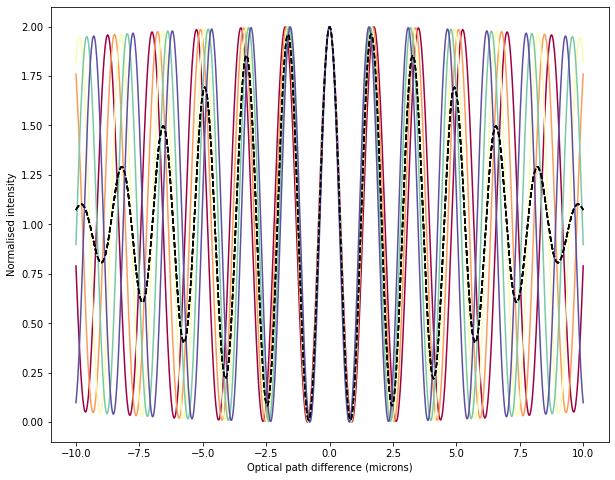

In [94]:
plt.figure(figsize=(10,8))
ax = plt.subplot(111)
for i in np.arange(interf.shape[0]):
    ax.plot(xscan*1e6, interf[i,:], color = rgba[i])
    ax.plot(xscan*1e6, np.sum(interf,axis=0)/np.average(np.sum(interf,axis=0)),'--', color="black")
    ax.set_xlabel("Optical path difference (microns)")
    ax.set_ylabel("Normalised intensity")

## The effect of chromatic dispersion

In [121]:
wavelmin = 1.45e-6
wavelmax = 1.65e-6
sigma = np.linspace(1/wavelmax, 1/wavelmin,5)
sigma0 = np.average(sigma)
nsample = 1024
scanlength = 40e-6
deltaD = 0.00 # no differential dispersion in coefficients
deltalength = 0.02 # 2cm of fiber length difference
length1 = 1 # length of arm
d2 = 15e-6 # converted 15 ps/nm/km which is s/m/m

In [122]:
dispersedphase = waveguide.dispersed_phase_foresto(sigma0, sigma, length1, deltalength, d2, deltaD)

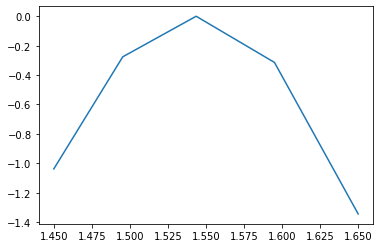

In [123]:
plot(1/sigma*1e6, dispersedphase)

In [124]:
interf, sigma, xscan = interferogram.opd_scan(nsample, sigma, scanlength, dispersedphase) 

In [125]:
# choisir les couleurs
cmap = matplotlib.cm.get_cmap('Spectral')
# construting an array of colors that span the spectral range
wavelarray = np.abs(1/sigma - wavelmax) / (wavelmax - wavelmin)
rgba = cmap(wavelarray)

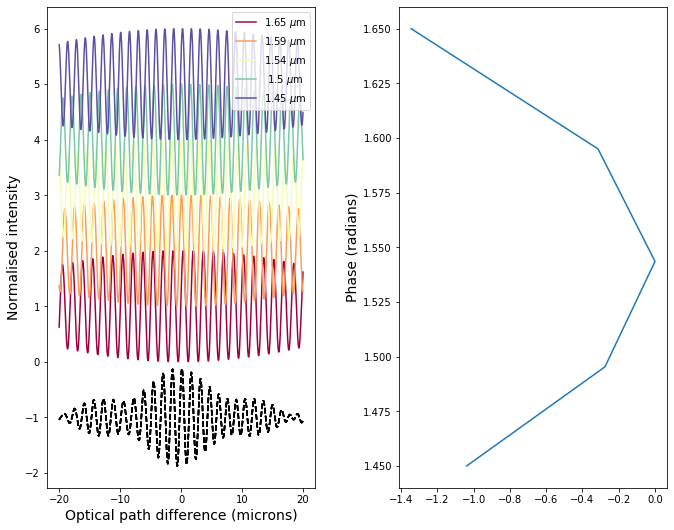

In [126]:
plt.figure(figsize=(10,8))
ax = plt.subplot(121)
for i in np.arange(interf.shape[0]):
    ax.plot(xscan*1e6, i + interf[i,:], color = rgba[i], label="{0:4.3} $\mu$m".format(1/sigma[i]*1e6))
    ax.plot(xscan*1e6, -2+np.sum(interf,axis=0)/np.average(np.sum(interf,axis=0)),'--', color="black")
    ax.set_xlabel("Optical path difference (microns)", size=14)
    ax.set_ylabel("Normalised intensity", size=14)
    ax.legend()
ax2 = plt.subplot(122)
ax2.plot(dispersedphase, 1/sigma *1e6)
ax2.set_ylabel("Wavelength ($\mu$m)", size=14)
ax2.set_ylabel("Phase (radians)", size=14)
plt.tight_layout(pad=3.0)